In [6]:
import pandas as pd

df_train = pd.read_csv('../dataset/train_lyrics_1000.csv')
df_test = pd.read_csv('../dataset/valid_lyrics_200.csv')

X_train = df_train['lyrics'].values 
y_train = df_train['mood'].values

X_test = df_test['lyrics'].values 
y_test = df_test['mood'].values

df_train.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


## Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

print('before: %s ...' %y_train[:5])
print('before: %s ...' %y_test[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:5])
print('after: %s ...' %y_test[:5])


before: ['sad' 'happy' 'sad' 'happy' 'sad'] ...
before: ['happy' 'sad' 'happy' 'sad' 'sad'] ...
after: [1 0 1 0 1] ...
after: [0 1 0 1 1] ...


In [8]:
with open('../dataset/stopwords_eng.txt') as sw:
    stopwords = sw.read().split()
stopwords[-10:]

['too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

## Feature extraction: Word counts and Vectorizers

#### Initial vocabularies

In [9]:
# With Text Split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

import re

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: text.split(),
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_1 = vec_porter.get_feature_names()
print(vocab_1[-10:])

Vocabular size: 11378 words
['zipped', 'zippin', 'zipping', 'zippo', 'zodiac', 'zoli', 'zombie', 'zone', 'zonin', 'zoo']


In [10]:
# With Porter Stemming

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split()],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_2 = vec_porter.get_feature_names()
print(vocab_2[-10:])

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Vocabular size: 8551 words
['zip', 'ziplock', 'zippin', 'zippo', 'zodiac', 'zoli', 'zombi', 'zone', 'zonin', 'zoo']


### Whitelists of positive and negative words

In [11]:
with open('../dataset/negative-words.txt', 'r') as w:
    negative_words = w.read().split()
print('number of negative words: %s' % len(negative_words))
negative_words[-5:]

number of negative words: 4783


['zaps', 'zealot', 'zealous', 'zealously', 'zombie']

In [12]:
with open('../dataset/positive-words.txt', 'r') as w:
    positive_words = w.read().split()
print('number of positive words: %s' % len(positive_words))
positive_words[-5:]

number of positive words: 2006


['youthful', 'zeal', 'zenith', 'zest', 'zippy']

In [13]:
negative_words = set(negative_words)
positive_words = set(positive_words)
semantic_words = negative_words.union(positive_words)

In [14]:
# With whitelist 

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [word for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_3 = vec_porter.get_feature_names()
print(vocab_3[-10:])

Vocabular size: 1666 words
['wrath', 'wreck', 'wrest', 'wrestle', 'wretched', 'wrong', 'yawn', 'yay', 'zest', 'zombie']


In [15]:
# With whitelist and Porter Stemming

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_4 = vec_porter.get_feature_names()
print(vocab_4[-10:])

Vocabular size: 1349 words
['wrath', 'wreck', 'wrest', 'wrestl', 'wretch', 'wrong', 'yawn', 'yay', 'zest', 'zombi']


### Summary vocabulary sizes

In [16]:
print('All words: %s ' % len(vocab_1))
print('Porter: %s ' % len(vocab_2))
print('Whitelist: %s ' % len(vocab_3))
print('Porter + Whitelist: %s ' % len(vocab_4))

All words: 11378 
Porter: 8551 
Whitelist: 1666 
Porter + Whitelist: 1349 


## Model Selection

In [17]:
# Requirements

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
import re
import pickle
from sklearn import metrics

porter = PorterStemmer()

semantic_words = pickle.load(open('../dataset/semantic_words.p', 'rb'))

with open('../dataset/stopwords_eng.txt') as sw:
    stop_words = sw.read().split()
    
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

#### Grid Search

In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [19]:
pipeline_1 = Pipeline([
    ('vect', CountVectorizer(binary=False,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_1 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be in

Best score: 0.632
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x000001E2C96B0F28>


In [20]:
pipeline_2 = Pipeline([
    ('vect', TfidfVectorizer(binary=False,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_2 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_2 = GridSearchCV(pipeline_2, 
                           parameters_2, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
grid_search_2.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters_2 = grid_search_2.best_estimator_.get_params()
for param_name in sorted(parameters_2.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be in

Best score: 0.606
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x000001E2C96B0F28>


#### ROC Curves

In [21]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)
vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', MultinomialNB(fit_prior=False, alpha=1.0))]))
    
for v in vectorizers[:6]:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', BernoulliNB(fit_prior=False, alpha=1.0))]))

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


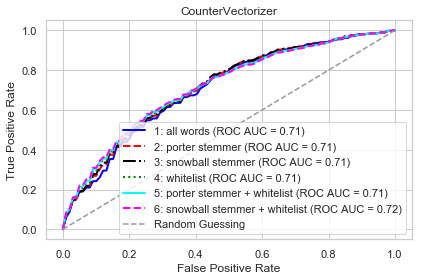

In [22]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(6)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]
mean = []
for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle = False)

    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean.append(interp(mean_fpr, fpr, tpr))
        mean[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr = np.mean(mean, axis = 0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('CounterVectorizer')
plt.tight_layout()
plt.savefig('../dataset/roc_gridsearch_1.png', dpi=300)
plt.show()

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


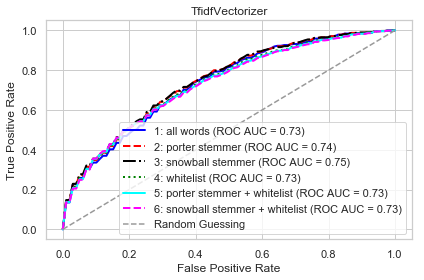

In [23]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(6,12)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]
mean =[]
for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle = False)

    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean.append(interp(mean_fpr, fpr, tpr))
        mean[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr = np.mean(mean, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('TfidfVectorizer')
plt.tight_layout()
plt.savefig('../dataset/roc_gridsearch_2.png', dpi=300)
plt.show()

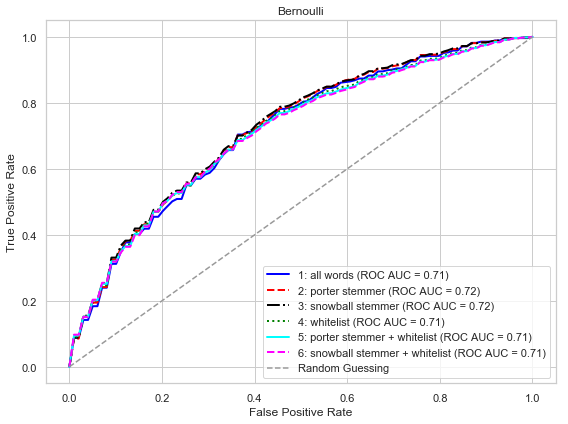

In [24]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(12,18)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]

mean=[]
plt.figure(figsize=(8,6))
for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle = False)

    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean.append(interp(mean_fpr, fpr, tpr))
        mean[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr = np.mean(mean, axis =0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Bernoulli')
plt.tight_layout()
plt.savefig('../dataset/roc_gridsearch_3.png', dpi=300)
plt.show()


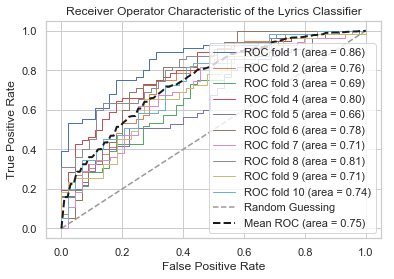

In [25]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

classifier = pipelines[7] # Tfidf + porter


cv = StratifiedKFold(n_splits=10, random_state=None, shuffle = False)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
mean = []
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean.append(interp(mean_fpr, fpr, tpr))
    mean[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')

mean_tpr = np.mean(mean, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic of the Lyrics Classifier')
plt.legend(loc="lower right")
plt.savefig('../dataset/roc_final.png', dpi=300)
plt.show()

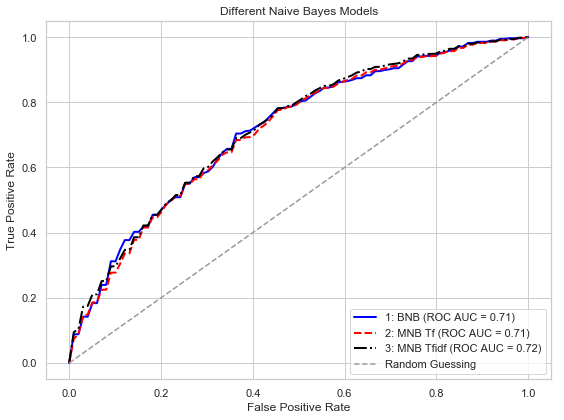

In [26]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[12], pipelines[0], pipelines[6]]
labels = ['1: BNB', 
          '2: MNB Tf',
          '3: MNB Tfidf',
          ]

plt.figure(figsize=(8,6))

mean = []
for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle = False)

    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean.append(interp(mean_fpr, fpr, tpr))
        mean[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr = np.mean(mean, axis = 0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Different Naive Bayes Models')
plt.tight_layout()
plt.savefig('../dataset/roc_different_nb.png', dpi=300)
plt.show()

## Validation

#### Confusion matrix

In [37]:
import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title, dest):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig(dest, dpi=300)
    plt.show()

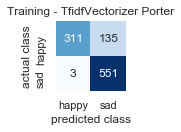

In [38]:
clf = pipelines[7] # Tfidf + porter

clf.fit(X_train, y_train)

plot_cm(X_train, y_train, clf, 'Training - TfidfVectorizer Porter', '../dataset/confmat_tfidf_porter_train.png')

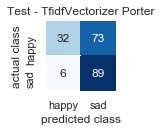

In [39]:
plot_cm(X_test, y_test, clf, 'Test - TfidfVectorizer Porter', '../dataset/confmat_tfidf_porter_test.png')

In [40]:
pipelines

[Pipeline(memory=None,
      steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1),
         preprocessor=<function <lambda> at 0x0000...8>,
         vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))]),
 Pipeline(memory=None,
      steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1),
         preprocessor=<function <lambda> at 0x0000...0>,
         vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))]),
 Pipeline(memory=None,
      steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
     

## ROC AUC, Accuracy, Precision, Recall, and F1-score

In [41]:
from sklearn.naive_bayes import BernoulliNB

In [42]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [43]:
labels = ['BNB Training', 'BNB Training porter', 'BNB Training wl', 'BNB Training porter+wl',
          'MNB Training-CountVec', 'MNB Training-CountVec porter', 'MNB Training-CountVec wl', 'MNB Training-CountVec porter+wl',
          'MNB Training-TfidfVec', 'MNB Training-TfidfVec porter', 'MNB Training-TfidfVec wl', 'MNB Training-TfidfVec porter+wl',
          'BNB Test', 'BNB Test porter', 'BNB Test wl', 'BNB Test porter+wl',
          'MNB Test-CountVec', 'MNB Test-CountVec porter', 'MNB Test-CountVec wl', 'MNB Test-CountVec porter+wl',
          'MNB Test-TfidfVec', 'MNB Test-TfidfVec porter', 'MNB Test-TfidfVec wl', 'MNB Test-TfidfVec porter+wl'
          ]
len(labels)

24

In [44]:
clf_5=pipelines[0]
clf_6=pipelines[1]
clf_7=pipelines[3]
clf_8=pipelines[5]

clf_9=pipelines[6]
clf_10=pipelines[7]
clf_11=pipelines[9]
clf_12=pipelines[11]

clf_1=pipelines[12]
clf_2=pipelines[13]
clf_3=pipelines[15]
clf_4=pipelines[17]

In [45]:
pipelines[6]

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function <lamb...ue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])

In [47]:
labels = ['BNB Training', 'BNB Training porter', 'BNB Training wl', 'BNB Training porter+wl',
          'MNB Training-CountVec', 'MNB Training-CountVec porter', 'MNB Training-CountVec wl', 'MNB Training-CountVec porter+wl',
          'MNB Training-TfidfVec', 'MNB Training-TfidfVec porter', 'MNB Training-TfidfVec wl', 'MNB Training-TfidfVec porter+wl',
          'BNB Test', 'BNB Test porter', 'BNB Test wl', 'BNB Test porter+wl',
          'MNB Test-CountVec', 'MNB Test-CountVec porter', 'MNB Test-CountVec wl', 'MNB Test-CountVec porter+wl',
          'MNB Test-TfidfVec', 'MNB Test-TfidfVec porter', 'MNB Test-TfidfVec wl', 'MNB Test-TfidfVec porter+wl'
          ]

d = {'Data':labels,
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}


for clf in [clf_9, clf_10, clf_11, clf_12, clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8]:
    clf.fit(X_train, y_train)

for clf in [clf_9, clf_10, clf_11, clf_12, clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8]:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_train, y_true=y_train))
    
for clf in [clf_9, clf_10, clf_11, clf_12, clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8]:  

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_test, y_true=y_test))


In [48]:
pd.set_option('precision', 2)

df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(labels)
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
BNB Training,90.5,99.72,78.92,88.11,89.37
BNB Training porter,86.2,99.04,69.73,81.84,84.59
BNB Training wl,84.8,81.96,84.53,83.22,84.77
BNB Training porter+wl,83.2,80.22,82.74,81.46,83.15
MNB Training-CountVec,96.5,93.82,98.65,96.17,96.71
MNB Training-CountVec porter,93.4,89.26,96.86,92.90,93.74
MNB Training-CountVec wl,81.1,72.12,93.95,81.60,82.35
MNB Training-CountVec porter+wl,78.7,69.91,91.70,79.34,79.97
MNB Training-TfidfVec,95.7,94.09,96.41,95.24,95.77
MNB Training-TfidfVec porter,93.6,92.83,92.83,92.83,93.52


In [49]:
for i, clf in enumerate([clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8, clf_9, clf_10, clf_11, clf_12]):
    print(i, clf)

0 Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function <lambda> at 0x0000...vocabulary=None)), ('clf', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False))])
1 Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function <lambda> at 0x0000...vocabulary=None)), ('clf', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False))])
2 Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<cl

In [50]:
df_perform.to_csv('../dataset/initial_clf_performance.csv', index_label=False, float_format='%2.2f')

## Cross Validation Scores

In [51]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Since cross-validation, use whole dataset
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((y_train, y_test))

labels = ['CountVec', 'CountVec porter', 'CountVec wl', 'CountVec porter+wl',
             'TfidfVec', 'TfidfVec porter', 'TfidfVec wl', 'TfidfVec porter+wl']

d = {'Data':labels,
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}

for clf in [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8]:
    clf.fit(X_train, y_train)
    
   
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring=acc_scorer, cv=10)
    d['ACC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))
    
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring=pre_scorer, cv=10)
    d['PRE (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))
    
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring=rec_scorer, cv=10)
    d['REC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))
    
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring=f1_scorer, cv=10)
    d['F1 (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))
    
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring=auc_scorer, cv=10)
    d['ROC AUC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['

In [52]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(labels)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
CountVec,65.33 (+/- 3.07),61.10 (+/- 3.24),67.88 (+/- 6.45),64.16 (+/- 3.79),65.52 (+/- 3.13)
CountVec porter,66.83 (+/- 3.00),62.92 (+/- 4.74),69.88 (+/- 7.16),65.85 (+/- 2.96),67.06 (+/- 2.77)
CountVec wl,62.91 (+/- 2.83),57.17 (+/- 2.59),78.05 (+/- 7.14),65.81 (+/- 2.85),64.06 (+/- 2.75)
CountVec porter+wl,64.25 (+/- 3.19),58.31 (+/- 2.97),78.95 (+/- 7.08),66.90 (+/- 3.12),65.36 (+/- 3.10)
TfidfVec,67.00 (+/- 4.07),65.30 (+/- 4.80),60.06 (+/- 6.20),62.48 (+/- 5.17),66.48 (+/- 4.16)
TfidfVec porter,67.66 (+/- 2.76),66.78 (+/- 3.68),59.16 (+/- 6.31),62.54 (+/- 4.27),67.02 (+/- 2.89)
TfidfVec wl,64.83 (+/- 5.30),60.72 (+/- 5.07),67.32 (+/- 8.33),63.63 (+/- 5.60),65.01 (+/- 5.26)
TfidfVec porter+wl,66.41 (+/- 4.34),62.40 (+/- 4.72),68.41 (+/- 8.04),65.03 (+/- 5.06),66.56 (+/- 4.36)


In [53]:
df = pd.DataFrame() 
df['actual'] = y_test 

In [54]:
prediction = clf_5.predict(X_test)
prediction

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [55]:
df['predicted'] = prediction
print(df.groupby(['actual','predicted']).size())

actual  predicted
0       0            104
        1              1
1       0              8
        1             87
dtype: int64


In [61]:
clf_5.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function <lambda> at 0x0000...8>,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])>

In [66]:
import dill
with open('./multinomial_model1.dill','wb') as pickle_out:
    dill.dump(clf_5, pickle_out)
    pickle_out.close()

In [74]:
with open('./multinomial_model1.dill','rb') as dill_load:
    model=dill.load(dill_load)
model

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function <lambda> at 0x0000...8>,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])

In [102]:
clf_5.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [100]:
def model_predict(text):
    text_file = open("Output.txt", "w")
    text_file.write(text)
    text_file.close()
    with open('Output.txt','rb') as doc:
        return model.predict(doc)
model_predict("sad happy sad happy sad sad")

array([1])